# Can the sunspot cycle be seen in the Keeling curve? 

Keeling curve data were obtained from this this source:
Keeling, Ralph F.; Keeling, Charles D. (2017). Atmospheric Monthly In Situ CO2 Data - Mauna Loa Observatory, Hawaii. In Scripps CO2 Program Data. UC San Diego Library Digital Collections. https://doi.org/10.6075/J08W3BHW Accessed on [*Date of Download].

Sunspot cycle data were obtained from here:
https://solarscience.msfc.nasa.gov/greenwch.shtml

First taking the Keeling curve data the file was converted to a csv file and at that time the headers were stripped and the first two months of the data of 1958 removed because the CO2 data was not available.  A small number of missing values were interpolated. 

In [1]:
import pandas as pd

CO2_data_df = pd.read_csv("CO2.txt", header = None)
CO2_data_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1958,3,21259,1958.2027,315.70,314.44,316.19,314.91,315.70,314.44
1,1958,4,21290,1958.2877,317.45,315.16,317.30,314.99,317.45,315.16
2,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71
3,1958,6,21351,1958.4548,316.69,-99.99,317.24,315.14,317.24,315.14
4,1958,7,21381,1958.5370,315.86,315.19,315.86,315.22,315.86,315.19


In [2]:
#remove columns that are not required
CO2_data_df = CO2_data_df.drop(CO2_data_df.columns[[2, 3, 5, 6, 7, 8, 9]], axis=1) 
CO2_data_df

,0,1,4
0,1958,3,315.70
1,1958,4,317.45
2,1958,5,317.51
3,1958,6,316.69
4,1958,7,315.86
...,...,...,...
738,2019,9,408.55
739,2019,10,408.43
740,2019,11,410.28
741,2019,12,411.85


In [3]:
#find the number of months data
months = CO2_data_df.shape[0]

In [ ]:
CO2_data_df.insert

In [4]:
range(months)

range(0, 743)

In [5]:
#find the CO2 ppm for each month
#first month is March 1958
for i in range(months):
    print(CO2_data_df.iloc[i, 2])

315.7
317.45
317.51
316.69
315.86
314.93
313.21
313.27
313.33
314.67
315.58
316.49
316.65
317.72
318.29
318.15
316.54
314.8
313.84
313.33
314.81
315.58
316.43
316.98
317.58
319.03
320.04
319.59
318.18
315.9
314.17
313.83
315.0
316.19
316.89
317.7
318.54
319.48
320.58
319.77
318.57
316.79
314.99
315.31
316.1
317.01
317.94
318.55
319.68
320.57
321.02
320.62
319.61
317.4
316.25
315.42
316.69
317.7
318.74
319.07
319.86
321.38
322.25
321.48
319.74
317.77
316.21
315.99
317.07
318.35
319.57
320.24
320.91
321.58
322.26
321.89
320.44
318.69
316.71
316.87
317.68
318.71
319.44
320.44
320.89
322.14
322.17
321.87
321.21
318.87
317.82
317.3
318.87
319.42
320.62
321.6
322.39
323.7
324.08
323.75
322.38
320.36
318.64
318.1
319.78
321.03
322.33
322.5
323.04
324.42
325.0
324.09
322.54
320.92
319.25
319.39
320.73
321.96
322.57
323.15
323.89
325.02
325.57
325.36
324.14
322.11
320.33
320.25
321.32
322.89
324.0
324.42
325.63
326.66
327.38
326.71
325.88
323.66
322.38
321.78
322.85
324.12
325.06
325.98
326.93


Now we can plot the data from March at monthly intervals.

Text(0, 0.5, 'CO2 concentration (ppm)')

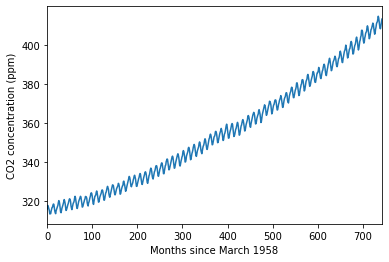

In [185]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

#plot the CO2 data per month
CO2_data_df.iloc[range(CO2_data_df.shape[0]), 2].plot()
plt.xlabel('Months since March 1958')
plt.ylabel('CO2 concentration (ppm)')

In [180]:
CO2_data_df.iloc[i, 2]

411.66

First we will average over 12 month periods to give a monthly rolling mean

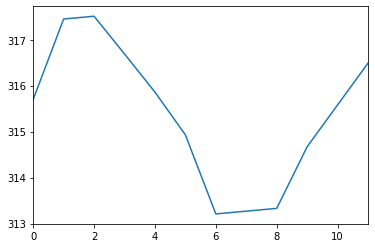

In [181]:
CO2_data_df.iloc[range(12), 2].plot()

In [28]:
CO2_data_df.iloc[range(12), 2]

0     315.70
1     317.45
2     317.51
3     316.69
4     315.86
5     314.93
6     313.21
7     313.27
8     313.33
9     314.67
10    315.58
11    316.49
Name: 4, dtype: float64

In [27]:
year_mean = CO2_data_df.iloc[range(12), 2].mean()
year_mean

315.3908333333333

In [37]:
year_means =[0,0,0,0,0,0,0,0,0,0,0] 
year_means

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [38]:
for i in range(months-11):
     year_means.append(CO2_data_df.iloc[range(i,i+12), 2].mean())

Add the rolling means to the dataframe

In [41]:
CO2_data_df['5'] = year_means
CO2_data_df

,0,1,4,5
0,1958,3,315.70,0.000000
1,1958,4,317.45,0.000000
2,1958,5,317.51,0.000000
3,1958,6,316.69,0.000000
4,1958,7,315.86,0.000000
...,...,...,...,...
738,2019,9,408.55,410.892500
739,2019,10,408.43,411.095833
740,2019,11,410.28,411.275833
741,2019,12,411.85,411.494167


Plot the rolling means.

Text(0, 0.5, 'CO2 concentration (ppm)')

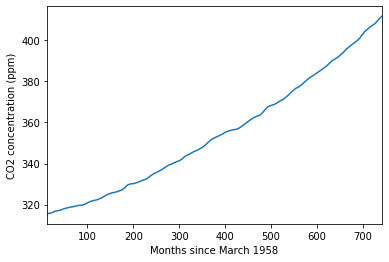

In [186]:
CO2_data_df.iloc[range(12, CO2_data_df.shape[0]), 3].plot()
plt.xlabel('Months since March 1958')
plt.ylabel('CO2 concentration (ppm)')

Now fit a second order polynomial to the rolling means

In [107]:
import numpy as np
from scipy.optimize import curve_fit

#x = range(12, CO2_data_df.shape[0])
x = np.linspace(12, 742, 731)
y = CO2_data_df.iloc[range(12, CO2_data_df.shape[0]), 3]

def fit_func(x, a, b, c):
    return a*x**2 + b*x +c

params = curve_fit(fit_func, x, y)

[a, b, c] = params[0]

In [110]:
fit =  a*x**2 + b*x +c

Text(0, 0.5, 'Polynomial fit to CO2 concentration (ppm)')

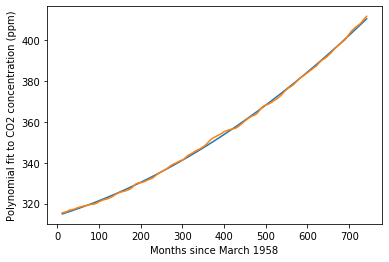

In [187]:
plt.plot(x, fit)
plt.plot(x, CO2_data_df.iloc[range(12, CO2_data_df.shape[0]), 3])
plt.xlabel('Months since March 1958')
plt.ylabel('Polynomial fit to CO2 concentration (ppm)')

This is a good fit so we can calculate and plot the residuals

In [113]:
residual = CO2_data_df.iloc[range(12, CO2_data_df.shape[0]), 3] - fit

Text(0, 0.5, 'Residual CO2 concentration (ppm)')

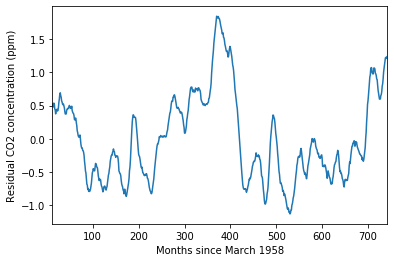

In [188]:
residual.plot()
plt.xlabel('Months since March 1958')
plt.ylabel('Residual CO2 concentration (ppm)')

The residuals appear to have the nature of a sum of frequency components so we will now calculate the frequency spectrum

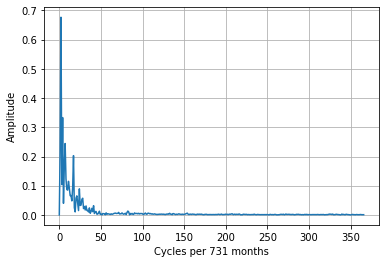

In [189]:
import scipy 
# Number of sample points
N = 731
# sample spacing
T = 1.0/731
x = np.linspace(0.0, N*T, N)
y = residual
yf = scipy.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

#plt.xscale('log')
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlabel('Cycles per 731 months')
plt.ylabel('Amplitude')

plt.grid()
plt.show()

In [152]:
2.0/N * np.abs(yf[0:N//2])

array([7.69290215e-10, 2.23399342e-01, 6.76889498e-01, 1.03754295e-01,
       3.33336330e-01, 3.97468441e-02, 1.66369361e-01, 2.44523770e-01,
       1.23767347e-01, 8.71082017e-02, 8.48915399e-02, 1.14995162e-01,
       9.21200679e-02, 6.61094836e-02, 6.62700697e-02, 4.80488500e-02,
       9.37934235e-02, 2.02981247e-01, 2.48245832e-02, 1.03493108e-02,
       5.77380600e-02, 6.53170851e-02, 3.94024814e-02, 1.48884492e-02,
       8.92174296e-02, 3.23580090e-02, 3.34397806e-02, 5.32211678e-02,
       5.71289047e-02, 2.17072161e-02, 2.88687471e-02, 1.69648129e-02,
       3.07318226e-02, 1.52041149e-02, 1.52409730e-02, 1.01667426e-02,
       2.40913719e-02, 5.62104162e-03, 1.18726995e-02, 2.27693583e-02,
       1.11205517e-02, 3.16225418e-02, 4.80590524e-03, 1.13416188e-02,
       1.16715577e-02, 2.50536697e-03, 3.00677935e-03, 6.79612427e-03,
       1.27087534e-02, 1.89337668e-03, 3.16764861e-03, 1.10674058e-04,
       4.68188392e-03, 4.08478197e-03, 3.72028891e-03, 5.27017370e-04,
      

In [153]:
xf

array([  0.        ,   1.00412088,   2.00824176,   3.01236264,
         4.01648352,   5.0206044 ,   6.02472527,   7.02884615,
         8.03296703,   9.03708791,  10.04120879,  11.04532967,
        12.04945055,  13.05357143,  14.05769231,  15.06181319,
        16.06593407,  17.07005495,  18.07417582,  19.0782967 ,
        20.08241758,  21.08653846,  22.09065934,  23.09478022,
        24.0989011 ,  25.10302198,  26.10714286,  27.11126374,
        28.11538462,  29.11950549,  30.12362637,  31.12774725,
        32.13186813,  33.13598901,  34.14010989,  35.14423077,
        36.14835165,  37.15247253,  38.15659341,  39.16071429,
        40.16483516,  41.16895604,  42.17307692,  43.1771978 ,
        44.18131868,  45.18543956,  46.18956044,  47.19368132,
        48.1978022 ,  49.20192308,  50.20604396,  51.21016484,
        52.21428571,  53.21840659,  54.22252747,  55.22664835,
        56.23076923,  57.23489011,  58.23901099,  59.24313187,
        60.24725275,  61.25137363,  62.25549451,  63.25

There is a discrete peak in the frequency spectrum at 17.07 cycles per 731 months, a period of approximately 43 months.  This is not consistent with the period of sunspots of approximately 11 years